<a href="https://colab.research.google.com/github/Hamza-Chekireb/Artificial-Intelligence-Data-Science-Data-Analysis-Portfolio/blob/main/Titanic_Passengers_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Remarque importante:
# Vous trouvez le checkpoint en bas (dernière partie).
# 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
df=pd.read_csv('C:/Users/LENOVO ADMIN/Desktop/AI GoMyCode/fichier/titanic-passengers.csv',sep=';')
df

### Afficher les premiers éléments


In [ ]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


### Afficher les informations générales

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


# Traitement des données
## nettoyage de données

#### Afficher le nombre de valeurs manquantes dans les colonnes avec des cases vides

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### supprimer les lignes avec plus de deux valeurs manquantes !!!

In [ ]:
df=pd.read_csv('C:/Users/LENOVO ADMIN/Desktop/AI GoMyCode/fichier/titanic-passengers.csv',sep=';')


In [ ]:
dfrd=df.dropna(axis=0, thresh=2, inplace=False)#ça n'a pas marché !!!
dfrd.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


### Remplacer les valeurs numériques manquantes par la moyenne

In [ ]:
dfrd.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [ ]:
dfrd['Age'].fillna(dfrd['Age'].mean(),inplace=True)
dfrd.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.000000,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.000000,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.000000,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.500000,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.000000,1,0,SC/AH 3085,26.0000,NaN,S


### Remplacer les valeurs catégoriques par les valeurs les plus fréquentes

In [ ]:
len(dfrd['Cabin'])

891

### Afficher la valeur catégorique la plus fréquente

In [ ]:
dfrd['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
C22 C26        3
              ..
C87            1
D7             1
B79            1
A16            1
D47            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
dfrd['Cabin'].fillna('G6',inplace=True)
dfrd


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S


## II.Transformation de caractéristiques
## 

### II.1 En utilisant la bibliothèque sklearn 
### 

In [ ]:
dfrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [ ]:
dfrd['Survived'].value_counts()
dfrd['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dfrd['Survived']=encoder.fit_transform(dfrd['Survived'])
dfrd['Sex']=encoder.fit_transform(dfrd['Sex'])
dfrd['Cabin']=encoder.fit_transform(dfrd['Cabin'])
dfrd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,145,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,140,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,145,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,145,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,38,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,145,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,145,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,145,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,145,S


### II.2 En utilisant les dictionnaires  
### 

In [ ]:
dict_Cabin={'Embarked' : {'C': 3, 'S' : 19, 'Q':17}}
dfrd.replace( dict_Cabin , inplace = True )
dfrd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,145,19.0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,140,19.0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,145,19.0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,145,19.0
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,38,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,145,3.0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,145,3.0
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,145,19.0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,145,19.0


In [ ]:
dfrd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,145,19.0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,140,19.0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,145,19.0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,145,19.0
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,38,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,145,3.0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,145,3.0
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,145,19.0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,145,19.0


### II.3 En utilisant la méthode one-hot   
### 

In [ ]:
df
one_hot=pd.get_dummies(df['Sex'])
df=df.drop('Sex', axis = 1)
df.join(one_hot)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,343,No,2,"Collander, Mr. Erik Gustaf",28.0,0,0,248740,13.0000,NaN,S,0,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",25.0,0,0,348123,7.6500,F G73,S,0,1
2,641,No,3,"Jensen, Mr. Hans Peder",20.0,0,0,350050,7.8542,NaN,S,0,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29.0,0,4,349909,21.0750,NaN,S,1,0
4,672,No,1,"Davidson, Mr. Thornton",31.0,1,0,F.C. 12750,52.0000,B71,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,C,1,0
887,61,No,3,"Sirayanian, Mr. Orsen",22.0,0,0,2669,7.2292,NaN,C,0,1
888,535,No,3,"Cacic, Miss. Marija",30.0,0,0,315084,8.6625,NaN,S,1,0
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",NaN,0,0,349215,7.8958,NaN,S,0,1


## III La sélection de caractéristiques 
## 

# Partie deux: Data visualisation
# 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

 ## I.1 visualisation en utilisant un histogramme
 ## 

### I.1.1.1 Age (en utilisant matplotlib)
### 

<AxesSubplot:title={'center':'Histogramme de l Age'}, xlabel='Age', ylabel='Frequency'>

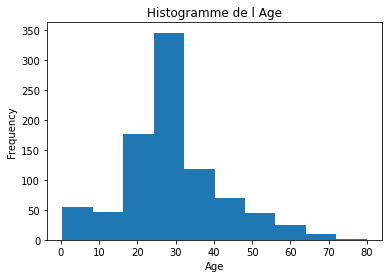

In [ ]:
plt.title('Histogramme de l Age')
plt.xlabel('Age')
dfrd['Age'].plot.hist()

### I.1.1.2 Age (en utilisant seaborn)
### 

C:\Users\LENOVO ADMIN\anaconda3\envs\notebook\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

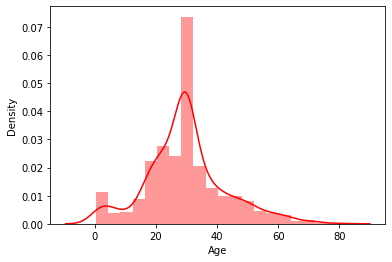

In [ ]:
sns.distplot(dfrd['Age'],bins=20,kde=True,color='red')

## I.2 visualisation en utilisant barplot
## 

### I.2.1 Visualisation en utilisant (Matplotlib)
### 

<AxesSubplot:title={'center':'Représentation des passenger class'}, xlabel='Les classes', ylabel='Nombre de passagers'>

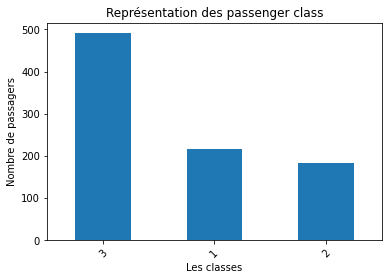

In [ ]:
plt.title('Représentation des passenger class')
plt.xlabel('Les classes')
plt.ylabel('Nombre de passagers')
vc = dfrd['Pclass'].value_counts()
vc.plot.bar(rot=45)

### I.2.1 Visualisation en utilisant (seaborn)
### 

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

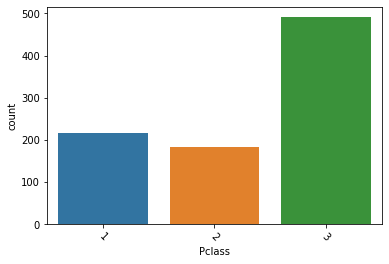

In [ ]:
sns.countplot(x='Pclass',data=dfrd)
#Ajouter une rotation 
plt.xticks(rotation=-45)

## I.3 visualisation en utilisant boxplot
## 

### I.3.1 Visualisation en utilisant (matplotlib)
### 

<AxesSubplot:title={'center':'Distribution de l Age'}>

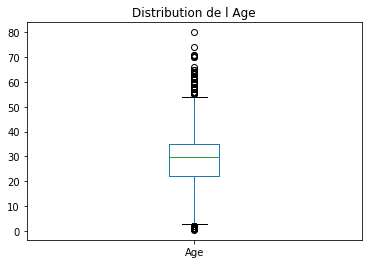

In [ ]:
plt.title('Distribution de l Age')
dfrd['Age'].plot.box()

### I.3.2 Visualisation en utilisant (seaborn)
### 

C:\Users\LENOVO ADMIN\anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

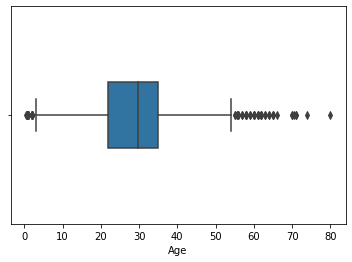

In [ ]:
sns.boxplot(dfrd['Age'],width=0.3)


### II Correlation 
### 

### II.1 Correlation entre l'age et le sex
### 

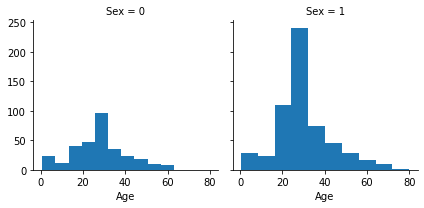

In [ ]:
g=sns.FacetGrid(dfrd,col='Sex')
g.map(plt.hist,'Age',bins=10)

### II.1 Correlation entre l'age, sex et survie
### 

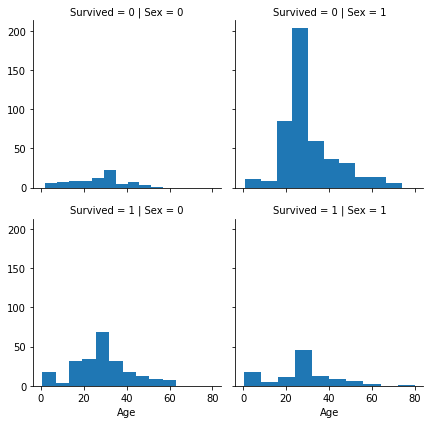

In [ ]:
grid = sns.FacetGrid(dfrd, row="Survived", col="Sex") #, size=2.2, aspect=1.6)
grid.map(plt.hist, "Age")
grid.add_legend()


### II.2 Correlation entre l'age, (Pclass) et survie
### 

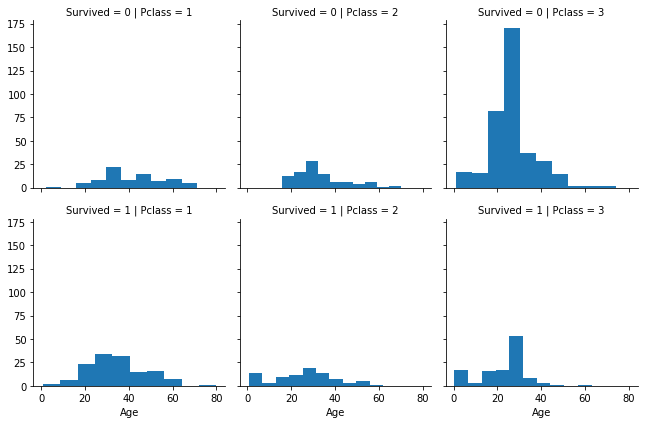

In [ ]:
grid = sns.FacetGrid(dfrd, row="Survived", col="Pclass") #, size=2.2, aspect=1.6)
grid.map(plt.hist, "Age")
grid.add_legend()


### II.3 Correlation entre l'age, (Embarked) et survie
### 

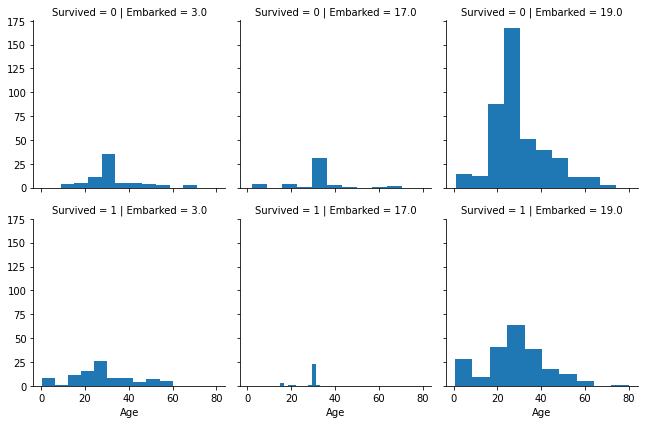

In [ ]:

grid = sns.FacetGrid(dfrd, row="Survived", col="Embarked") #, size=2.2, aspect=1.6)
grid.map(plt.hist, "Age")
grid.add_legend()


In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(v

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )



SyntaxError: invalid syntax (<ipython-input-29-85bd31fc9526>, line 11)

In [ ]:
plot_correlation_map(dfrd)

### La fonction donne une visualisation graphique des corrélations de toutes les colonnes.
### 
### Son utilité est d’étudier la relation linéaire entre certaines colonnes sélectionnées.
### 
### On remarque que les valeurs sont maximales au niveau de diagonale de la matrice, car il s’agit de la corrélation de la caractéristique et elle-même. On distingue aussi une valeur élevée de 0.68 de corrélation entre les classe de passagers et les cabines ce qui est tout à fait normale car chaque classe possède ces propres cabines. La plus faible valeur remarquées est égale à -0.55 c’est une relation linéaire inverse qui explique l’augmentation du prix en fonction d’une classe d’ordre supérieur.

In [ ]:
dfrd[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()


In [ ]:
#dfrd.drop(['Name'],axis=1)
#dfrd
#dfrd.drop(['PassengerId'],axis=1)
#dfrd.drop(['Name'],axis=1)
#dfrd=dfrd.drop(['Ticket'],axis=1)
dfrd

In [ ]:
df

In [ ]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
dfa=df['Title']
dfa.value_counts()

In [ ]:

df2=dfrd.drop('Title',axis=1)
df2.insert(2, "Title", df['Title'], True)
df3=df2
df3

In [ ]:
Title_Dictionary = {'Title':{

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"}

                    }
df3.replace(Title_Dictionary,inplace=True)
df3

## 
## Checkpoints 03
## Logistic Regression:
### 

### Afficher les output 

### 1. Apply logistic regression. 



In [ ]:
print(dfrd['Survived'])

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    1
Name: Survived, Length: 891, dtype: int32


In [ ]:
# Importer la fonction de division de la trame de données
from sklearn.model_selection import train_test_split
# Importer le modèle de regression logistique 
from sklearn.linear_model import LogisticRegression
# Importer les caractéritiques de performances
from sklearn import metrics

#Extraction des caractéristiques  'Sex','Embarked','Age'
x = dfrd[['Pclass', 'Sex','Age']]
y = dfrd['Survived']

# La division des données en données d'entrainement et données de test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)  

#choisir le modèle
logreg = LogisticRegression()

#calibrer le modèle 
logreg.fit(x_train,y_train)

#tester le  modèle
y_pred  = logreg.predict(x_test)

print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))


Accuracy=0.81


### 2. Use a confusion matrix to validate your model. 



In [ ]:
#importer la  bibliothèque des graphes 
import seaborn as sns

<AxesSubplot:xlabel='prédit', ylabel='Actuel'>

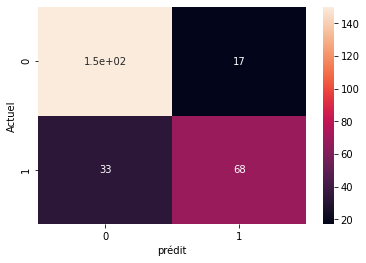

In [ ]:
Matrice_confusion = pd.crosstab(y_test, y_pred, rownames=['Actuel'], colnames=['prédit'])
sns.heatmap(Matrice_confusion, annot=True)


In [ ]:
Matrice_confusion

### 3. Another validation matrix for classification is ROC / AUC, do your research on them explain them, and apply them in our case.
### 

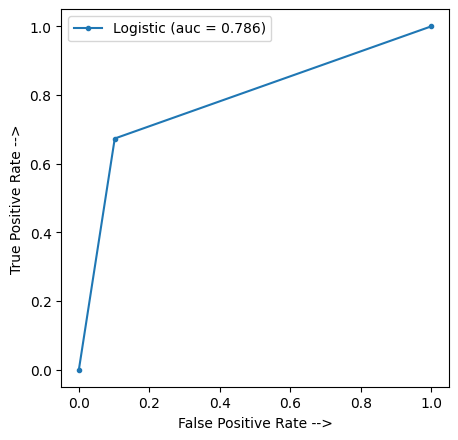

In [ ]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()
